## Problem Statement

Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for **working professionals** better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

**MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps**. For those who **attend, MedCamp provides them facility to undergo health checks or increase awareness by visiting various stalls** (depending on the format of camp). 

**MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between “Registration” and Number of people taking tests at the Camps**. In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.

### The Process:

* MedCamp employees / volunteers reach out to people and drive registrations.
* During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.
 
 
### Other things to note:

* Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.
* For a few camps, there was hardware failure, so some information about date and time of registration is lost.
* MedCamp runs 3 formats of these camps. The **first and second format provides people with an instantaneous health score**. **The  third format provides information about several health issues through various awareness stalls.**


### Favorable outcome:

* For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
* You need to predict the chances (probability) of having a favourable outcome.
 

In [1]:
# IMporting necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [2]:
# Information about the files

data_dict = pd.read_excel(r"D:\Case Study\Day 2\Train\Data_Dictionary.xlsx")
data_dict

,Details of the Files
0,Health_Camp_Detail.csv – File containing Healt...
1,Train.csv – File containing registration detai...
2,Patient_Profile.csv – This file contains Patie...
3,First_Health_Camp_Attended.csv – This file con...
4,Second_Health_Camp_Attended.csv - This file co...
5,Third_Health_Camp_Attended.csv - This file con...
6,Test.csv – File containing registration detail...


In [3]:
train = pd.read_csv(r"D:\Case Study\Day 2\Train\Train.csv")
test = pd.read_csv(r"D:\Case Study\Day 2\test_l0Auv8Q.csv")
submission = pd.read_csv(r"D:\Case Study\Day 2\sample_submmission.csv")

In [4]:
train.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7


In [5]:
# Importing the additional files of the dataset

fhc = pd.read_csv(r"D:\Case Study\Day 2\Train\First_Health_Camp_Attended.csv")
shc = pd.read_csv(r"D:\Case Study\Day 2\Train\Second_Health_Camp_Attended.csv")
thc = pd.read_csv(r"D:\Case Study\Day 2\Train\Third_Health_Camp_Attended.csv")
hc = pd.read_csv(r"D:\Case Study\Day 2\Train\Health_Camp_Detail.csv")
pp = pd.read_csv(r"D:\Case Study\Day 2\Train\Patient_Profile.csv")


In [6]:
fhc.head(2)

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN
1,494977,6560,20,0.097561,NaN


In [7]:
shc.head(2)

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700


In [8]:
thc.head(2)

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1


In [9]:
hc.head(2)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2


In [10]:
pp.head(2)

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry


In [11]:
# lets combined the train and test dataset

combined = pd.concat([train,test],ignore_index=True)
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


In [12]:
combined.shape

(110527, 8)

In [13]:
# Lets join patient profile to combined dataset

combined = pd.merge(combined,pp,on=["Patient_ID"],how="left")

In [14]:
# Combined the first healthcamps

combined = pd.merge(combined,fhc,on=["Patient_ID","Health_Camp_ID"],how="left")
combined = pd.merge(combined,shc,on=["Patient_ID","Health_Camp_ID"],how="left")
combined = pd.merge(combined,thc,on=["Patient_ID","Health_Camp_ID"],how="left")


In [15]:
combined.head(10)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number
0,489652,6578,10-Sep-05,4,0,0,0,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
1,507246,6578,18-Aug-05,45,5,0,0,7,0,0,0,0,1,75,40,08-Sep-04,C,Others,NaN,NaN,NaN,NaN,NaN,NaN
2,523729,6534,29-Apr-06,0,0,0,0,0,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN
3,524931,6535,07-Feb-04,0,0,0,0,0,0,0,0,0,None,None,None,07-Feb-04,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,521364,6529,28-Feb-06,15,1,0,0,7,0,0,0,1,1,70,40,04-Jul-03,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN
5,494493,6570,20-May-05,0,0,0,0,0,0,0,0,0,None,None,None,01-Feb-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,523001,6562,22-May-05,0,0,0,0,0,0,0,0,0,None,None,None,07-Apr-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,500733,6535,31-Jan-04,0,0,0,0,0,0,0,0,0,None,None,None,23-Mar-03,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,501155,6538,31-Jan-04,0,0,0,0,0,0,0,0,0,None,None,None,31-Jan-04,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,501457,6538,12-Aug-04,0,0,0,0,0,0,0,0,0,0,None,None,28-Jan-03,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Combine the healthcare details

combined = pd.merge(combined,hc,on=["Health_Camp_ID"],how="left")

In [17]:
# Lets preview the data

combined

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,0,0,0,0,1,75,40,08-Sep-04,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,0,0,0,0,None,None,None,07-Feb-04,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,0,0,0,1,1,70,40,04-Jul-03,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,507261,6525,13-Apr-06,12,2,0,0,6,0,0,1,1,1,None,37,17-Feb-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08-Apr-06,17-Apr-06,First,C,2
110523,513607,6551,03-Nov-06,0,0,0,0,0,0,0,0,0,None,None,None,14-Sep-05,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13-Nov-06,18-Nov-06,Second,D,2
110524,498160,6584,17-Jun-06,0,0,0,0,0,0,0,0,0,None,None,None,11-Jun-04,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04-Aug-06,09-Aug-06,Second,A,2
110525,502444,6567,13-Jan-07,0,0,0,0,0,0,0,0,0,None,None,None,04-May-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-Jan-07,04-Feb-07,Second,D,2


# EDA

In [18]:
combined["Social_Media"] = combined.Online_Follower+combined.LinkedIn_Shared+combined.Twitter_Shared+combined.Facebook_Shared

In [19]:
# Registration date,camp_start_date, camp_end_date, first_interaction_date changing to date time format

combined["Registration_Date"] = pd.to_datetime(combined.Registration_Date,dayfirst=True)
combined["First_Interaction"] = pd.to_datetime(combined.First_Interaction,dayfirst=True)
combined["Camp_Start_Date"] = pd.to_datetime(combined.Camp_Start_Date,dayfirst=True)
combined["Camp_End_Date"] = pd.to_datetime(combined.Camp_End_Date,dayfirst=True)


In [20]:
# createaing the interaction date with the help of  

combined["Interaction_Days"] = combined.Registration_Date - combined.First_Interaction

In [21]:
combined.head(1)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278 days


In [22]:
# Remove days from the Intearction variable created

combined["Interaction_Days"] = combined.Interaction_Days.dt.days

In [23]:
combined.head(1)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0


In [24]:
# Creating a new variable Camp Duration with the help of Camp Start Date and Camp end date

combined["Camp_duration"] = combined.Camp_End_Date - combined.Camp_Start_Date

In [25]:
combined.head(1)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_duration
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59 days


In [26]:
# Removing the days from the Camp duration variable/columns

combined["Camp_duration"] = combined.Camp_duration.dt.days

In [27]:
combined.head(1)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_duration
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59


In [28]:
# Difference of days between Camp start date and registration date

combined["magic1"]  = (np.absolute(combined.Camp_Start_Date - combined.Registration_Date)).dt.days

In [29]:
# Difference of days between Camp end date and registration date

combined["magic2"]  = (combined.Camp_End_Date - combined.Registration_Date).dt.days

In [30]:
# Difference of days between Camp end date and First_Interaction date

combined["Pt_duration"]  = (combined.Camp_End_Date - combined.First_Interaction).dt.days

In [31]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_duration,magic1,magic2,Pt_duration
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751,194.0,557.0,1233
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17,6.0,11.0,11
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4,30.0,34.0,1004


In [32]:
# First interaction >> Registration date >> Camp is org >> person comes >> Health camp >> Health score else stall visit

# first interaction date >> Registration Date >> Camp date

#camp end date>>camp start date >>registraction date 

def dates_between(start,reg,end):
    if(end>start>reg):
        return 1
    else:
        return 0

In [33]:
combined["dates_seq"] = combined.apply(lambda x:dates_between(x["Camp_Start_Date"],x["Registration_Date"],x["Camp_End_Date"]),axis = 1)

In [34]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_duration,magic1,magic2,Pt_duration,dates_seq
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751,194.0,557.0,1233,0
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17,6.0,11.0,11,0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4,30.0,34.0,1004,1


In [35]:
combined["Registration_Day"] = combined.Camp_Start_Date.dt.year
combined["Registration_Month"] = combined.Registration_Date.dt.month
combined["Registration_Year"] = combined.Registration_Date.dt.year

In [36]:
combined["Camp_Start_Year"] = combined.Registration_Date.dt.year
combined["Camp_End_Year"] = combined.Camp_Start_Date.dt.year
combined["First_Interaction_Year"] = combined.First_Interaction.dt.year

In [37]:
combined.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_duration,magic1,magic2,Pt_duration,dates_seq,Registration_Day,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Interaction_Year
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0,2005,9.0,2005.0,2005.0,2005,2004
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0,2005,8.0,2005.0,2005.0,2005,2004


In [38]:
# No of patients per day

combined["Patient_per_day"] = combined.groupby("Registration_Day")["Patient_ID"].transform("nunique")

In [39]:
# No of patients per month

combined["Patient_per_month"] = combined.groupby("Registration_Month")["Patient_ID"].transform("nunique")

In [40]:
# No of patients per year

combined["Patient_per_year"] = combined.groupby("Registration_Year")["Patient_ID"].transform("nunique")

<AxesSubplot:xlabel='Patient_per_month', ylabel='count'>

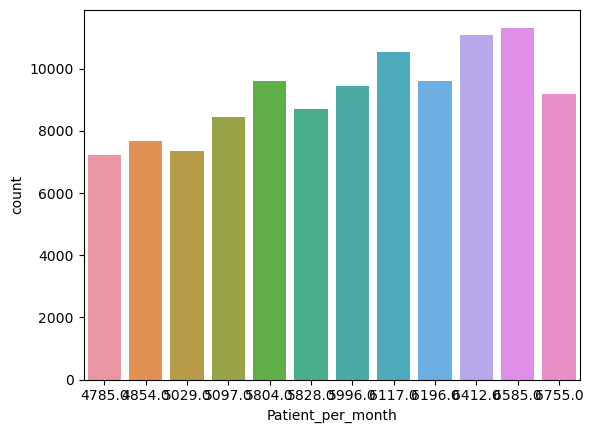

In [41]:
sns.countplot(combined.Patient_per_month)


In [42]:
# Frequency of PT ID

#sns.countplot(combined.groupby("Patient_ID")["Registration_Day"].transform("nunique"))

combined["Patient_frequency_per_Day"] = combined.groupby("Patient_ID")["Registration_Day"].transform("nunique")
combined["Patient_frequency_per_Month"] = combined.groupby("Patient_ID")["Registration_Month"].transform("nunique")
combined["Patient_frequency_per_Year"] = combined.groupby("Patient_ID")["Registration_Year"].transform("nunique")

In [43]:
# PT Frequency in health camp

combined["Patient_frequency_hc"] = combined.groupby("Health_Camp_ID")["Patient_ID"].transform("nunique")

In [44]:
# No of health camps

combined["Health_camp_year"] = combined.groupby("Camp_End_Year")["Health_Camp_ID"].transform("nunique")

In [45]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_duration,magic1,magic2,Pt_duration,dates_seq,Registration_Day,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Interaction_Year,Patient_per_day,Patient_per_month,Patient_per_year,Patient_frequency_per_Day,Patient_frequency_per_Month,Patient_frequency_per_Year,Patient_frequency_hc,Health_camp_year
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0,2005,9.0,2005.0,2005.0,2005,2004,22359,6585.0,15710.0,3,7,3,2837,19
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0,2005,8.0,2005.0,2005.0,2005,2004,22359,5804.0,15710.0,4,12,4,2837,19
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751,194.0,557.0,1233,0,2005,4.0,2006.0,2006.0,2005,2004,22359,4785.0,19318.0,3,4,2,3597,19
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17,6.0,11.0,11,0,2004,2.0,2004.0,2004.0,2004,2004,10902,5029.0,9646.0,3,4,3,1882,16
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4,30.0,34.0,1004,1,2006,2.0,2006.0,2006.0,2006,2003,16175,5029.0,19318.0,5,9,4,3823,21


In [46]:
# Target variable

# If the health_score>0 or num of stall visited >0, return 1 else return 0

def tgt(hs,hs_,stall_visit,stall_no):
    if ((hs>0) or (hs_>0) or (stall_visit>0) or (stall_no>0)):
        return 1
    else:
        return 0

In [47]:
combined["Target"] = combined.apply(lambda x:tgt(x["Health_Score"],x["Health Score"],x["Number_of_stall_visited"],x["Last_Stall_Visited_Number"]),axis=1)

In [48]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_duration,magic1,magic2,Pt_duration,dates_seq,Registration_Day,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Interaction_Year,Patient_per_day,Patient_per_month,Patient_per_year,Patient_frequency_per_Day,Patient_frequency_per_Month,Patient_frequency_per_Year,Patient_frequency_hc,Health_camp_year,Target
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0,2005,9.0,2005.0,2005.0,2005,2004,22359,6585.0,15710.0,3,7,3,2837,19,1
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0,2005,8.0,2005.0,2005.0,2005,2004,22359,5804.0,15710.0,4,12,4,2837,19,0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751,194.0,557.0,1233,0,2005,4.0,2006.0,2006.0,2005,2004,22359,4785.0,19318.0,3,4,2,3597,19,1
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17,6.0,11.0,11,0,2004,2.0,2004.0,2004.0,2004,2004,10902,5029.0,9646.0,3,4,3,1882,16,0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4,30.0,34.0,1004,1,2006,2.0,2006.0,2006.0,2006,2003,16175,5029.0,19318.0,5,9,4,3823,21,1


In [49]:
# Check the count of target

combined.Target.value_counts()

0    89993
1    20534
Name: Target, dtype: int64

In [50]:
# Droping some data

newdata = combined.drop(columns=["Patient_ID","Health_Camp_ID","Registration_Date","Online_Follower","Online_Follower","Online_Follower","Facebook_Shared","First_Interaction","Unnamed: 4","Camp_Start_Date","Camp_End_Date"],axis=1)

In [51]:
newdata.shape

(110527, 42)

In [52]:
# Lets apply frequency encoding on category1, category2, category3

newdata["Category1"] = pd.factorize(newdata.Category1)[0]
newdata["Category2"] = pd.factorize(newdata.Category2)[0]

In [56]:
# Drop the Donation Columns

newdata.drop(columns="Donation",inplace=True)

In [58]:
newdata.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'LinkedIn_Shared',
       'Twitter_Shared', 'Income', 'Education_Score', 'Age', 'City_Type',
       'Employer_Category', 'Health_Score', 'Health Score',
       'Number_of_stall_visited', 'Last_Stall_Visited_Number', 'Category1',
       'Category2', 'Category3', 'Social_Media', 'Interaction_Days',
       'Camp_duration', 'magic1', 'magic2', 'Pt_duration', 'dates_seq',
       'Registration_Day', 'Registration_Month', 'Registration_Year',
       'Camp_Start_Year', 'Camp_End_Year', 'First_Interaction_Year',
       'Patient_per_day', 'Patient_per_month', 'Patient_per_year',
       'Patient_frequency_per_Day', 'Patient_frequency_per_Month',
       'Patient_frequency_per_Year', 'Patient_frequency_hc',
       'Health_camp_year', 'Target'],
      dtype='object')

In [59]:
# Replace Income, education, and age by np.Nan

newdata.replace(to_replace="None",value=np.nan,inplace=True)

In [63]:
# Drop the additional columns

newdata.drop(columns=["Last_Stall_Visited_Number","Number_of_stall_visited","Health_Score","Health Score"],axis=1,inplace=True)

In [64]:
newdata

,Var1,Var2,Var3,Var4,Var5,LinkedIn_Shared,Twitter_Shared,Income,Education_Score,Age,City_Type,Employer_Category,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_duration,magic1,magic2,Pt_duration,dates_seq,Registration_Day,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Interaction_Year,Patient_per_day,Patient_per_month,Patient_per_year,Patient_frequency_per_Day,Patient_frequency_per_Month,Patient_frequency_per_Year,Patient_frequency_hc,Health_camp_year,Target
0,4,0,0,0,2,0,0,NaN,NaN,NaN,-1,NaN,0,0,2,0,278.0,59,25.0,34.0,312,0,2005,9.0,2005.0,2005.0,2005,2004,22359,6585.0,15710.0,3,7,3,2837,19,1
1,45,5,0,0,7,0,0,1,75,40,0,Others,0,0,2,0,344.0,59,2.0,57.0,401,0,2005,8.0,2005.0,2005.0,2005,2004,22359,5804.0,15710.0,4,12,4,2837,19,0
2,0,0,0,0,0,0,0,NaN,NaN,NaN,-1,NaN,1,1,2,0,676.0,751,194.0,557.0,1233,0,2005,4.0,2006.0,2006.0,2005,2004,22359,4785.0,19318.0,3,4,2,3597,19,1
3,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,2,2,2,0,0.0,17,6.0,11.0,11,0,2004,2.0,2004.0,2004.0,2004,2004,10902,5029.0,9646.0,3,4,3,1882,16,0
4,15,1,0,0,7,0,0,1,70,40,1,Technology,1,1,2,1,970.0,4,30.0,34.0,1004,1,2006,2.0,2006.0,2006.0,2006,2003,16175,5029.0,19318.0,5,9,4,3823,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,12,2,0,0,6,0,1,1,NaN,37,-1,NaN,2,6,2,2,786.0,9,5.0,4.0,790,0,2006,4.0,2006.0,2006.0,2006,2004,16175,4785.0,19318.0,5,11,4,166,21,0
110523,0,0,0,0,0,0,0,NaN,NaN,NaN,6,NaN,1,4,2,0,415.0,5,10.0,15.0,430,1,2006,11.0,2006.0,2006.0,2006,2005,16175,5828.0,19318.0,2,3,2,2180,21,0
110524,0,0,0,0,0,0,0,NaN,NaN,NaN,4,NaN,1,1,2,0,736.0,5,48.0,53.0,789,1,2006,6.0,2006.0,2006.0,2006,2004,16175,6412.0,19318.0,3,8,3,3041,21,0
110525,0,0,0,0,0,0,0,NaN,NaN,NaN,-1,NaN,1,4,2,0,619.0,5,17.0,22.0,641,1,2007,1.0,2007.0,2007.0,2007,2005,2579,6755.0,2797.0,3,3,2,2441,2,0


In [65]:
newdata.Income.value_counts()

0    11919
1     7132
2     5209
3     2728
4     1310
5      566
6      321
Name: Income, dtype: int64

In [66]:
newdata["Income"] = pd.factorize(newdata.Income)[0]
newdata["Education_Score"] = pd.factorize(newdata.Education_Score)[0]

In [54]:
newdata["City_Type"] = pd.factorize(newdata.City_Type)[0]

In [67]:
newdata["Employer_Category"] = pd.factorize(newdata.Employer_Category)[0]

In [ ]:
# Tips =  To deal with Numerical data we can use KBINS Discretizer

In [68]:
newdata["Age"] = newdata.Age.astype("float")

In [70]:
# newdata.Age.fillna(newdata.Age.median(),inplace=True)

,Var1,Var2,Var3,Var4,Var5,LinkedIn_Shared,Twitter_Shared,Income,Education_Score,Age,City_Type,Employer_Category,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_duration,magic1,magic2,Pt_duration,dates_seq,Registration_Day,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Interaction_Year,Patient_per_day,Patient_per_month,Patient_per_year,Patient_frequency_per_Day,Patient_frequency_per_Month,Patient_frequency_per_Year,Patient_frequency_hc,Health_camp_year,Target
0,4,0,0,0,2,0,0,-1,-1,NaN,-1,-1,0,0,2,0,278.0,59,25.0,34.0,312,0,2005,9.0,2005.0,2005.0,2005,2004,22359,6585.0,15710.0,3,7,3,2837,19,1
1,45,5,0,0,7,0,0,0,0,40.0,0,0,0,0,2,0,344.0,59,2.0,57.0,401,0,2005,8.0,2005.0,2005.0,2005,2004,22359,5804.0,15710.0,4,12,4,2837,19,0
2,0,0,0,0,0,0,0,-1,-1,NaN,-1,-1,1,1,2,0,676.0,751,194.0,557.0,1233,0,2005,4.0,2006.0,2006.0,2005,2004,22359,4785.0,19318.0,3,4,2,3597,19,1
3,0,0,0,0,0,0,0,-1,-1,NaN,1,-1,2,2,2,0,0.0,17,6.0,11.0,11,0,2004,2.0,2004.0,2004.0,2004,2004,10902,5029.0,9646.0,3,4,3,1882,16,0
4,15,1,0,0,7,0,0,0,1,40.0,1,1,1,1,2,1,970.0,4,30.0,34.0,1004,1,2006,2.0,2006.0,2006.0,2006,2003,16175,5029.0,19318.0,5,9,4,3823,21,1


In [71]:
newdata["Age"] = pd.factorize(newdata.Age)[0]

In [75]:
newdata

,Var1,Var2,Var3,Var4,Var5,LinkedIn_Shared,Twitter_Shared,Income,Education_Score,Age,City_Type,Employer_Category,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_duration,magic1,magic2,Pt_duration,dates_seq,Registration_Day,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Interaction_Year,Patient_per_day,Patient_per_month,Patient_per_year,Patient_frequency_per_Day,Patient_frequency_per_Month,Patient_frequency_per_Year,Patient_frequency_hc,Health_camp_year,Target
0,4,0,0,0,2,0,0,-1,-1,-1,-1,-1,0,0,2,0,278.0,59,25.0,34.0,312,0,2005,9.0,2005.0,2005.0,2005,2004,22359,6585.0,15710.0,3,7,3,2837,19,1
1,45,5,0,0,7,0,0,0,0,0,0,0,0,0,2,0,344.0,59,2.0,57.0,401,0,2005,8.0,2005.0,2005.0,2005,2004,22359,5804.0,15710.0,4,12,4,2837,19,0
2,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,1,1,2,0,676.0,751,194.0,557.0,1233,0,2005,4.0,2006.0,2006.0,2005,2004,22359,4785.0,19318.0,3,4,2,3597,19,1
3,0,0,0,0,0,0,0,-1,-1,-1,1,-1,2,2,2,0,0.0,17,6.0,11.0,11,0,2004,2.0,2004.0,2004.0,2004,2004,10902,5029.0,9646.0,3,4,3,1882,16,0
4,15,1,0,0,7,0,0,0,1,0,1,1,1,1,2,1,970.0,4,30.0,34.0,1004,1,2006,2.0,2006.0,2006.0,2006,2003,16175,5029.0,19318.0,5,9,4,3823,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,12,2,0,0,6,0,1,0,-1,22,-1,-1,2,6,2,2,786.0,9,5.0,4.0,790,0,2006,4.0,2006.0,2006.0,2006,2004,16175,4785.0,19318.0,5,11,4,166,21,0
110523,0,0,0,0,0,0,0,-1,-1,-1,6,-1,1,4,2,0,415.0,5,10.0,15.0,430,1,2006,11.0,2006.0,2006.0,2006,2005,16175,5828.0,19318.0,2,3,2,2180,21,0
110524,0,0,0,0,0,0,0,-1,-1,-1,4,-1,1,1,2,0,736.0,5,48.0,53.0,789,1,2006,6.0,2006.0,2006.0,2006,2004,16175,6412.0,19318.0,3,8,3,3041,21,0
110525,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,1,4,2,0,619.0,5,17.0,22.0,641,1,2007,1.0,2007.0,2007.0,2007,2005,2579,6755.0,2797.0,3,3,2,2441,2,0


In [78]:
newdata.isnull().sum()[newdata.isnull().sum()!=0].index

Index(['Interaction_Days', 'magic1', 'magic2', 'Registration_Month',
       'Registration_Year', 'Camp_Start_Year', 'Patient_per_month',
       'Patient_per_year'],
      dtype='object')

In [79]:
cols = ['Interaction_Days', 'magic1', 'magic2', 'Registration_Month',
       'Registration_Year', 'Camp_Start_Year', 'Patient_per_month',
       'Patient_per_year']

for i in cols:
    newdata.loc[:,i].fillna(newdata.loc[:,i].median(),inplace=True)

In [80]:
newdata.magic1.describe()

count    110527.000000
mean         66.812752
std          95.426873
min           0.000000
25%           7.000000
50%          32.000000
75%          71.000000
max         500.000000
Name: magic1, dtype: float64

In [84]:
newdata.isnull().sum()[newdata.isnull().sum()!=0]

Series([], dtype: int64)

In [83]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Var1                         110527 non-null  int64  
 1   Var2                         110527 non-null  int64  
 2   Var3                         110527 non-null  int64  
 3   Var4                         110527 non-null  int64  
 4   Var5                         110527 non-null  int64  
 5   LinkedIn_Shared              110527 non-null  int64  
 6   Twitter_Shared               110527 non-null  int64  
 7   Income                       110527 non-null  int64  
 8   Education_Score              110527 non-null  int64  
 9   Age                          110527 non-null  int64  
 10  City_Type                    110527 non-null  int64  
 11  Employer_Category            110527 non-null  int64  
 12  Category1                    110527 non-null  int64  
 13 

## Modelling

In [86]:
# Split the data in train and test

newtrain = newdata.loc[0:train.shape[0]-1,:]
newtest = newdata.loc[train.shape[0]:,:]

In [88]:
# drop the target variable from the train and test

X = newtrain.drop("Target", axis =1)
newtest = newtest.drop("Target", axis =1)
y = newtrain.Target

In [95]:
# Importing the required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score,StratifiedKFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [101]:


def base_models():
    models=dict()
    models['lg']= LogisticRegression()
    #model["dTree"] = DecisionTreeClassifier(criterion='entropy')
    models['rf']= RandomForestClassifier(criterion='entropy')
    models['ada']= AdaBoostClassifier()
    models['gbm']= GradientBoostingClassifier()
    models['xgb']= XGBClassifier()
    models['lgbm']= LGBMClassifier()
    models['catboost']= CatBoostClassifier()
    return models

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
def eval_score(model):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score = cross_val_score(model,X,y,scoring='f1',cv=cv,error_score='raise',n_jobs=-1)
    return score

In [ ]:
# Build the models

model = base_models()

result, names = list(), list()
for name,model in model.items():
    finalscore = eval_score(model)
    result.append(finalscore)
    names.append(name)
    print("%s %.3f (%.3f)"% (name, np.mean(result), np.std(result)))

lg 0.173 (0.013)
rf 0.434 (0.261)
ada 0.494 (0.230)
gbm 0.532 (0.209)
